In [1]:
import numpy as np
import pandas as pd
import emukit
import GPy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_film = pd.read_excel('...', sheet_name='11_30_film')
df_film.columns = ['ML Condition', 'Number', 'Speed [mm/s]',
       'Power [%]', 'Frequency [KHz]', 'Spacing [mm]', 'Type',
       'Success or Fail', 'Notes']
df_film_1130 = df_film

df_film = pd.read_excel('...', sheet_name='12_10_film')
df_film.columns = ['ML Condition', 'Number', 'Speed [mm/s]',
       'Power [%]', 'Frequency [KHz]', 'Spacing [mm]', 'Type',
       'Success or Fail', 'Notes']
df_film_1210 = df_film

df_film = pd.read_excel('...', sheet_name='12_15_film')
df_film.columns = ['ML Condition', 'Number', 'Speed [mm/s]',
       'Power [%]', 'Frequency [KHz]', 'Spacing [mm]', 'Type',
       'Success or Fail', 'Notes']
df_film_1215 = df_film

df_film = pd.read_excel('...', sheet_name='12_20_film')
df_film.columns = ['ML Condition', 'Number', 'Speed [mm/s]',
       'Power [%]', 'Frequency [KHz]', 'Spacing [mm]', 'Type',
       'Success or Fail', 'Notes']
df_film_1220 = df_film

df_film = pd.concat([df_film_1130, df_film_1210, df_film_1215, df_film_1220], ignore_index = True)
df_film.iloc[:,:-1]
success_conditions = df_film[df_film['Success or Fail']==1]['ML Condition'].values
failed_conditions = df_film[df_film['Success or Fail']==0]['ML Condition'].values

df_film

,ML Condition,Number,Speed [mm/s],Power [%],Frequency [KHz],Spacing [mm],Type,Success or Fail,Notes
0,1,1,200,70,10,0.01,3,1,NaN
1,2,1,900,40,20,0.05,3,1,NaN
2,3,1,1000,30,30,0.01,3,1,NaN
3,4,2,100,20,20,0.11,2,0,NaN
4,5,2,600,30,20,0.07,2,1,NaN
5,6,2,900,10,30,0.09,3,0,NaN
6,7,3,300,100,20,0.03,1,1,NaN
7,8,3,1000,40,20,0.13,2,1,NaN
8,9,4,100,30,10,0.15,2,1,NaN
9,10,4,1000,60,20,0.11,3,1,NaN


In [3]:
df_csc = pd.read_excel('...', sheet_name='11_30_csc')
df_csc.columns = ['ML Condition', 'Number', 'Speed [mm/s]',
       'Power [%]', 'Frequency [KHz]', 'Spacing [mm]', 'Type',
       'FDT [s]', 'RFDT']
df_csc_1130 = df_csc

df_csc = pd.read_excel('...', sheet_name='12_10_csc')
df_csc.columns = ['ML Condition', 'Number', 'Speed [mm/s]',
       'Power [%]', 'Frequency [KHz]', 'Spacing [mm]', 'Type',
       'FDT [s]', 'RFDT']
df_csc_1210 = df_csc

df_csc = pd.read_excel('...', sheet_name='12_15_csc')
df_csc.columns = ['ML Condition', 'Number', 'Speed [mm/s]',
       'Power [%]', 'Frequency [KHz]', 'Spacing [mm]', 'Type',
       'FDT [s]', 'RFDT']
df_csc_1215 = df_csc

df_csc = pd.read_excel('...', sheet_name='12_20_csc')
df_csc.columns = ['ML Condition', 'Number', 'Speed [mm/s]',
       'Power [%]', 'Frequency [KHz]', 'Spacing [mm]', 'Type',
       'FDT [s]', 'RFDT']
df_csc_1220 = df_csc

df_csc = pd.concat([df_csc_1130, df_csc_1210, df_csc_1215, df_csc_1220], ignore_index = True)

df_csc = df_csc.sort_values(by=list(df_csc.iloc[:,[0,-1]].columns)).drop_duplicates('ML Condition', keep = 'last', ignore_index = True)
df_csc_failed = df_csc[df_csc['ML Condition'].isin(failed_conditions)]
df_csc = df_csc[df_csc['ML Condition'].isin(success_conditions)]

df_csc

,ML Condition,Number,Speed [mm/s],Power [%],Frequency [KHz],Spacing [mm],Type,FDT [s],RFDT
0,1,1,200,70,10,0.01,3,54.81,2.16
1,2,1,900,40,20,0.05,3,305.71,12.05
2,3,1,1000,30,30,0.01,3,126.34,4.98
4,5,2,600,30,20,0.07,2,271.46,10.70
6,7,3,300,100,20,0.03,1,120.25,4.74
7,8,3,1000,40,20,0.13,2,114.67,4.52
8,9,4,100,30,10,0.15,2,385.12,15.18
9,10,4,1000,60,20,0.11,3,343.26,13.53
11,12,5,1000,50,10,0.05,1,354.93,13.99
12,13,8,700,90,10,0.11,2,399.32,15.74


In [4]:
success_conditions

array([ 1,  2,  3,  5,  7,  8,  9, 10, 12, 13, 14, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], dtype=int64)

In [5]:
df_csc.iloc[df_csc['RFDT'].values>10]

,ML Condition,Number,Speed [mm/s],Power [%],Frequency [KHz],Spacing [mm],Type,FDT [s],RFDT
1,2,1,900,40,20,0.05,3,305.71,12.05
4,5,2,600,30,20,0.07,2,271.46,10.70
8,9,4,100,30,10,0.15,2,385.12,15.18
9,10,4,1000,60,20,0.11,3,343.26,13.53
11,12,5,1000,50,10,0.05,1,354.93,13.99
12,13,8,700,90,10,0.11,2,399.32,15.74
16,17,7,1300,70,10,0.09,1,316.11,12.46
17,18,8,500,50,20,0.03,3,373.71,14.73
21,22,6,700,70,10,0.01,1,509.13,20.06
23,24,7,500,60,10,0.11,2,316.02,12.46


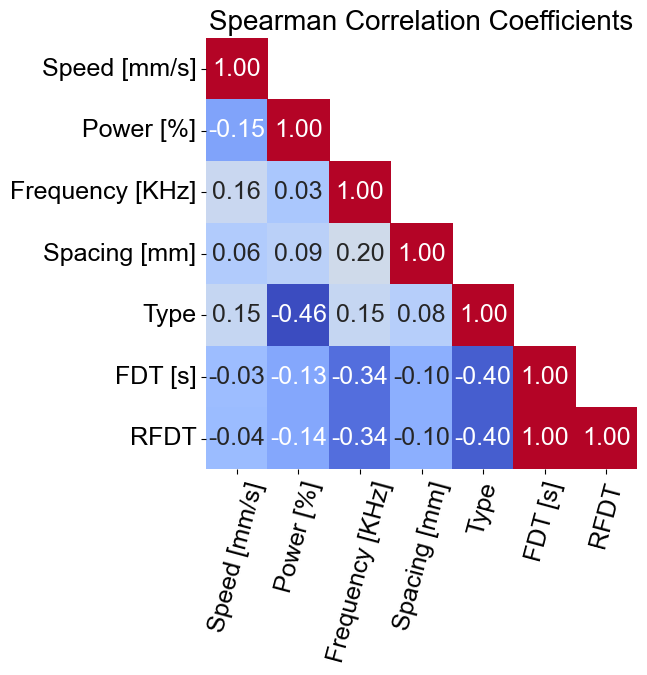

In [6]:
df = df_csc
df = df.iloc[:,2:]
df_cols = df.columns
method  = 'spearman'
corr = df.corr(method= method)
corr.columns = df_cols
df_len = len(df_cols)
fs = 18


fig, ax=plt.subplots(figsize=(df_len*0.8,df_len*0.8))
sns.set(font_scale=1.5)
sns.set_style("ticks",{'xtick.direction': 'in',
                       'ytick.direction':'in',
                       'xtick.top': False,'ytick.right': False})
mask = np.triu(np.ones_like(corr, dtype=np.bool),k=1)
cmap = plt.get_cmap('coolwarm')
sns.heatmap(corr, mask = mask, cbar_kws={"shrink": .2}, annot=True, fmt='.2f', 
            cmap=cmap, cbar=False, ax=ax, square=True)
ax.set_xlim(0, df_len)
ax.set_ylim(df_len, 0)
ax.set_title(method.capitalize()+" Correlation Coefficients", fontsize = 20)
plt.xticks(rotation=75, fontsize = fs)
plt.yticks(rotation=0, fontsize = fs) 
plt.show()

In [7]:
numb_min, numb_max, numb_step = [1, 10, 1]
numb_var = np.arange(numb_min, numb_max+numb_step, numb_step)
numb_num = len(numb_var)

speed_min, speed_max, speed_step = [100, 1500, 100]
speed_var = np.arange(speed_min, speed_max+speed_step, speed_step)
speed_num = len(speed_var)

power_min, power_max, power_step = [10, 100, 10]
power_var = np.arange(power_min, power_max+power_step, power_step) 
power_num = len(power_var)

freq_min, freq_max, freq_step = [10, 50, 10]
freq_var = np.arange(freq_min, freq_max+freq_step, freq_step)
freq_num = len(freq_var)

spac_min, spac_max, spac_step = [0.01, 0.15, 0.01]
spac_var = np.arange(spac_min, spac_max+spac_step, spac_step)
spac_num = len(spac_var)

type_min, type_max, type_step = [1, 3, 1]
type_var = np.arange(type_min, type_max+type_step, type_step)
type_num = len(type_var)


var_array = [numb_var, speed_var, 
             power_var, freq_var, 
             spac_var, type_var]
x_labels = ['Number', 
            'Speed [mm/s]',
            'Power [%]', 
            'Frequency [KHz]', 
            'Spacing [mm]', 
            'Type']

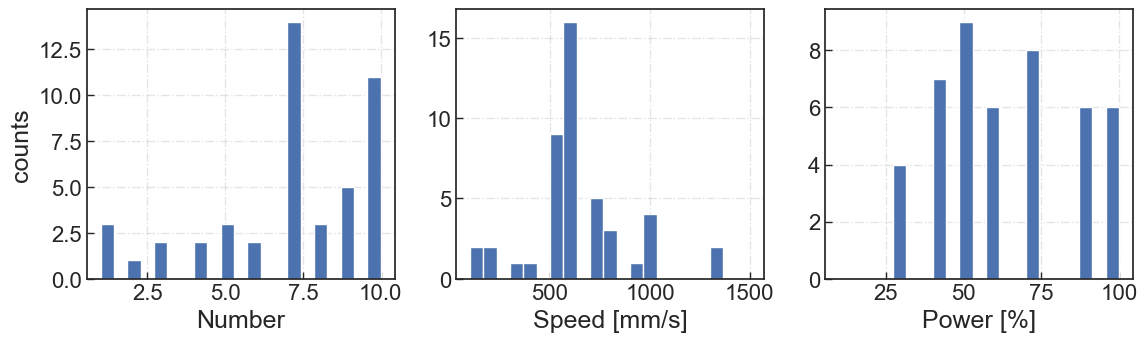

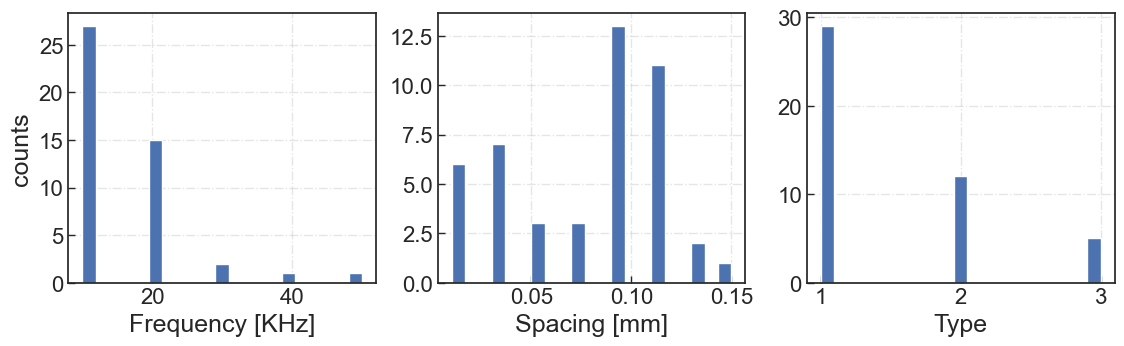

In [8]:
df = df_csc.iloc[:,1:7]
df_cols = df.columns
n_col = 3

for n in np.arange(0, 6, n_col):
    fig,axes = plt.subplots(1, n_col, figsize=(4.5*n_col, 3.5), sharey = False)
    fs = 20
    for i in np.arange(n_col):
        if n< len(df_cols):
            if n< len(var_array):
                axes[i].hist(df.iloc[:,n], bins= 21, range = (min(var_array[n]),max(var_array[n])))####
            else:
                axes[i].hist(df.iloc[:,n], bins= 21)

            axes[i].set_xlabel(df_cols[n], fontsize = 18)
      
        else:
            axes[i].axis("off")
        n = n+1      
    axes[0].set_ylabel('counts', fontsize = 18)
    for i in range(len(axes)):
        axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
        axes[i].grid(True, linestyle='-.')
    plt.show()

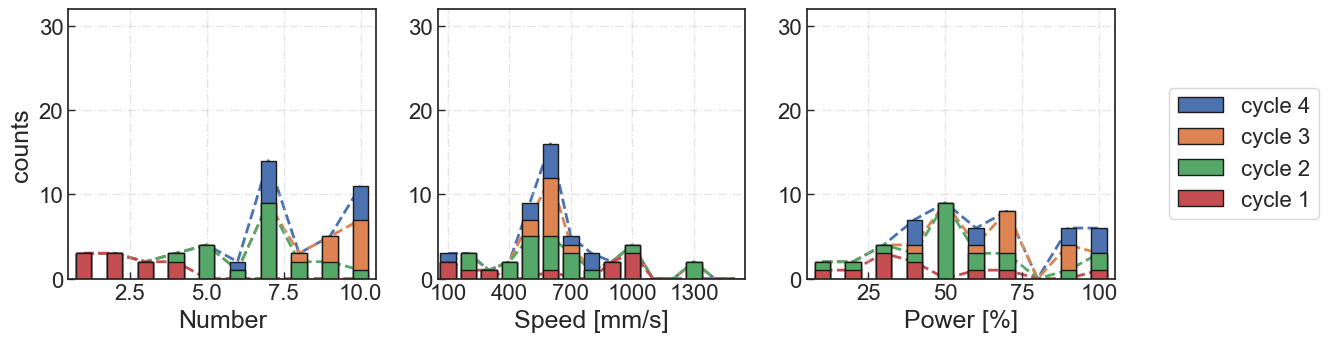

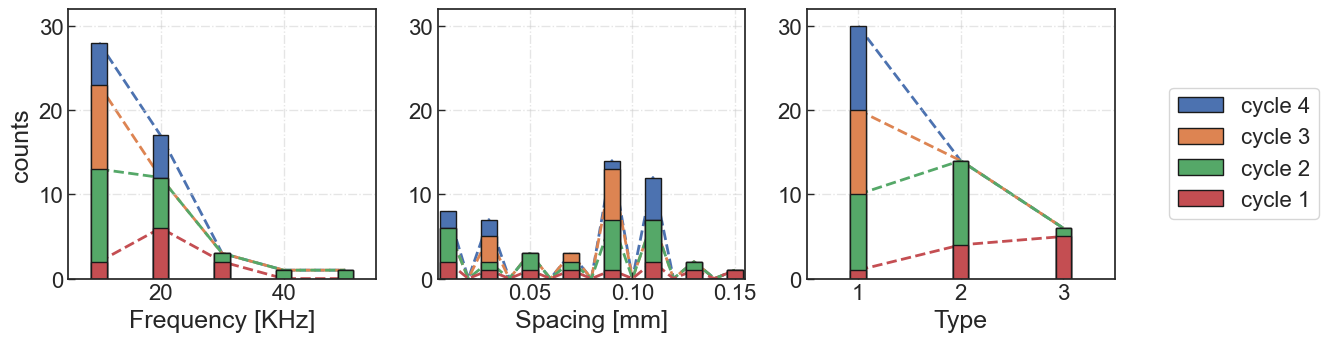

In [9]:
df = df_film.iloc[:,1:7]
df_cols = df.columns
n_col = 3

for n in np.arange(0, 6, n_col):
    fig,axes = plt.subplots(1, n_col, figsize=(4.5*n_col, 3.5), sharey = False)
    fs = 20
    for i in np.arange(n_col):
        if n< len(df_cols):
            c=0
            label= ['cycle 4','cycle 3', 'cycle 2', 'cycle 1']
            for cond in [40, 30, 20, 0]:
                
                data = df.iloc[0:cond+10,n]
                if n< len(var_array):
                    step = (max(var_array[n])-min(var_array[n]))/(len(var_array[n])-1)
                    h,e = np.histogram(data, bins=len(var_array[n]),range = (min(var_array[n])-step/2,max(var_array[n])+step/2))
                    axes[i].bar(var_array[n],h, width = 0.05*len(var_array[n])*step, edgecolor='k', alpha = 1, label = label[c])
                    axes[i].plot(var_array[n],h,'--', alpha = 1, zorder = 0, linewidth = 2)

                    axes[i].set_xlim(min(var_array[n])-step/2,max(var_array[n])+step/2)
            
                else:
                    axes[i].hist(data, bins= 21)

                axes[i].set_xlabel(df_cols[n], fontsize = 18)
                axes[i].set_ylim(0, 32)
                axes[i].set_yticks([0, 10, 20, 30])

                c=c+1
                
            if n==0:
                axes[i].set_xticks([2.5, 5, 7.5, 10])
            if n==1:
                axes[i].set_xticks([100, 400, 700, 1000, 1300])
            if n==4:
                axes[i].set_xticks([0.05, 0.1, 0.15])
            if n==5:
                axes[i].set_xticks([1, 2, 3])
        
           
        else:
            axes[i].axis("off")
        n = n+1      
    axes[0].set_ylabel('counts', fontsize = 18)
    axes[-1].legend(fontsize = 16,bbox_to_anchor=(1.7, 0.75))

    for i in range(len(axes)):
        axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
        axes[i].grid(True, linestyle='-.')
    plt.show()
    
#     fig.savefig(f"full_plot_{n}.png", dpi=600, bbox_inches='tight')

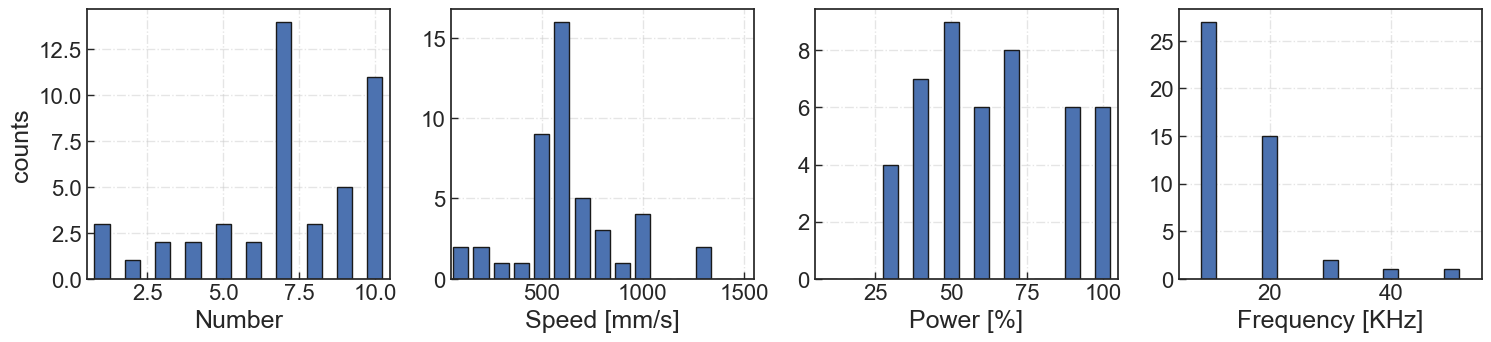

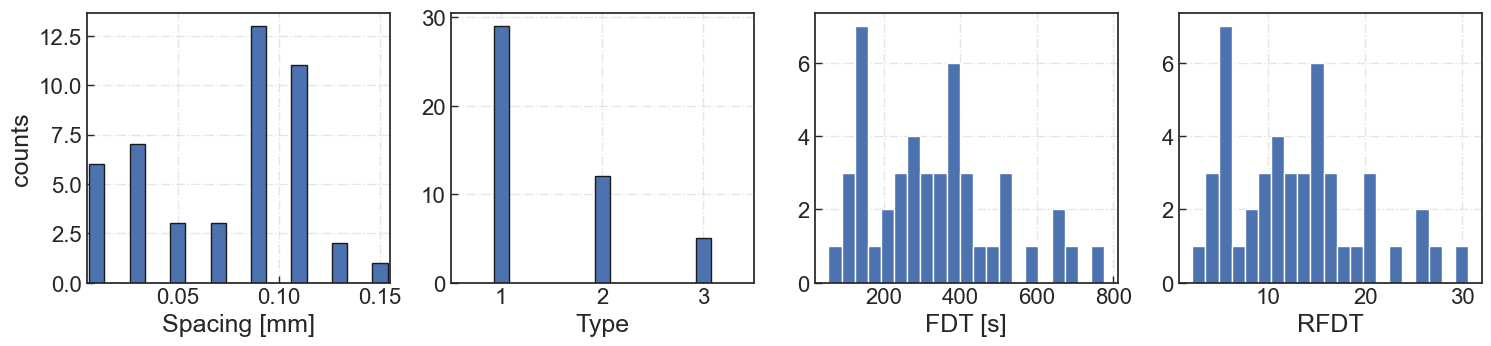

In [10]:
df = df_csc.iloc[:,1:]
df_cols = df.columns
n_col = 4

for n in np.arange(0, 8, n_col):
    fig,axes = plt.subplots(1, n_col, figsize=(18, 3.5), sharey = False)
    fs = 20
    for i in np.arange(n_col):
        if n< len(df_cols):
            if n< len(var_array):
                step = (max(var_array[n])-min(var_array[n]))/(len(var_array[n])-1)
                h,e = np.histogram(df.iloc[:,n], bins=len(var_array[n]),range = (min(var_array[n])-step/2,max(var_array[n])+step/2))
                axes[i].bar(var_array[n],h, width = 0.05*len(var_array[n])*step, edgecolor='k')
               
                axes[i].set_xlim(min(var_array[n])-step/2,max(var_array[n])+step/2)
                
            else:
                axes[i].hist(df.iloc[:,n], bins= 21)

            axes[i].set_xlabel(df_cols[n], fontsize = 18)
            
        else:
            axes[i].axis("off")
        n = n+1      
    axes[0].set_ylabel('counts', fontsize = 18)
    for i in range(len(axes)):
        axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
        axes[i].grid(True, linestyle='-.')
    plt.show()

No handles with labels found to put in legend.


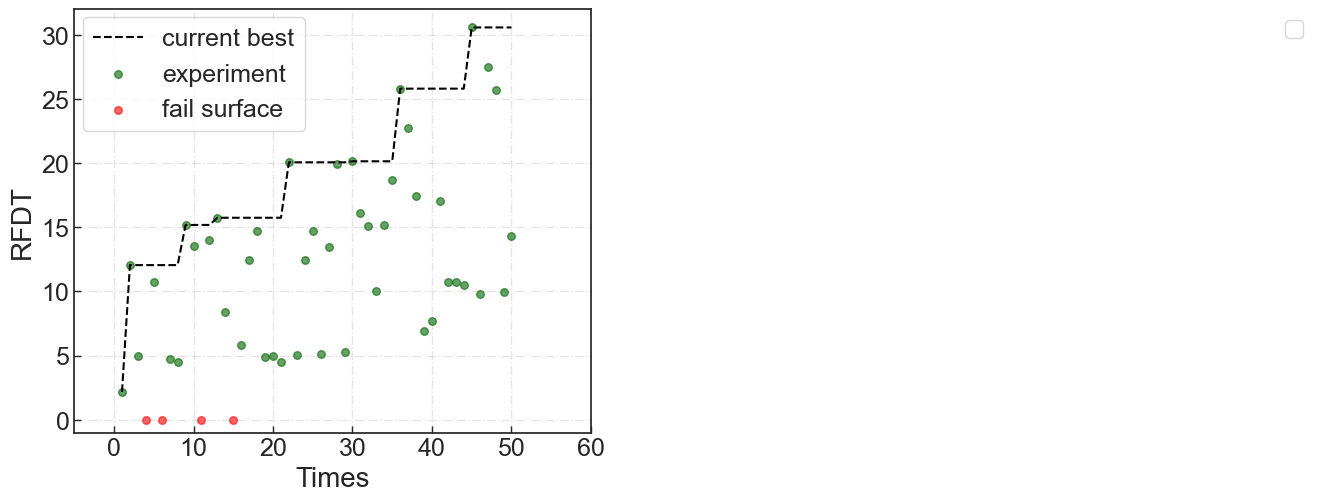

In [11]:
csc_rfdt = df_csc.sort_values('ML Condition').iloc[:,[0,-1]].values
csc_rfdt_best = df_csc.sort_values(by=list(df_csc.iloc[:,[0,-1]].columns)).drop_duplicates('ML Condition', keep = 'last', ignore_index = True)
csc_rfdt_best = csc_rfdt_best.sort_values('ML Condition').iloc[:,[0,-1]].values
film_quality = df_film.sort_values('ML Condition').iloc[:,[0,-2]].values

fig, axes = plt.subplots(1, 2, figsize=(16, 5.5), sharey = False)
fs = 20
exp_cond = np.transpose(csc_rfdt)[0]
exp_rfdt = np.transpose(csc_rfdt)[1]

axes[0].scatter(exp_cond, exp_rfdt, facecolor = 'darkgreen',
            edgecolor = 'darkgreen', s = 30, alpha = 0.6, label = 'experiment')

unsuccess_film = np.transpose(film_quality[film_quality[:,-1] ==0])
axes[0].scatter(unsuccess_film[0], unsuccess_film[1],
                facecolor = 'red',
                edgecolor = 'red', alpha = 0.6,
                s = 30, label = 'fail surface')

all_cond = np.concatenate([csc_rfdt, np.transpose(unsuccess_film)])
all_cond = all_cond[np.argsort(all_cond[:,0])]
axes[0].plot(np.transpose(all_cond)[0], np.maximum.accumulate(np.transpose(all_cond)[1]), '--',
         marker = 'o', ms = 0, c = 'black', label = 'current best')

axes[0].set_ylabel('RFDT', fontsize = 20)
axes[0].set_xlabel('Times', fontsize = 20)

axes[0].set_ylim(-1, 32)
axes[0].set_xlim(-5, 60)
axes[0].set_xticks(np.arange(0,70,10))
axes[0].legend(fontsize = fs*0.9, bbox_to_anchor=(0.47, 1.01))

for ax in axes:
    ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.9, grid_alpha = 0.5)
    ax.grid(True, linestyle='-.')
axes[1].axis("off")

plt.subplots_adjust(wspace = 0.4)
plt.legend(fontsize = fs*0.8)

# plt.savefig('zhexian1.png', dpi = 600, bbox_inches='tight')
plt.show()

The color is for variable RFDT with yellow as the highest and purple as the lowest


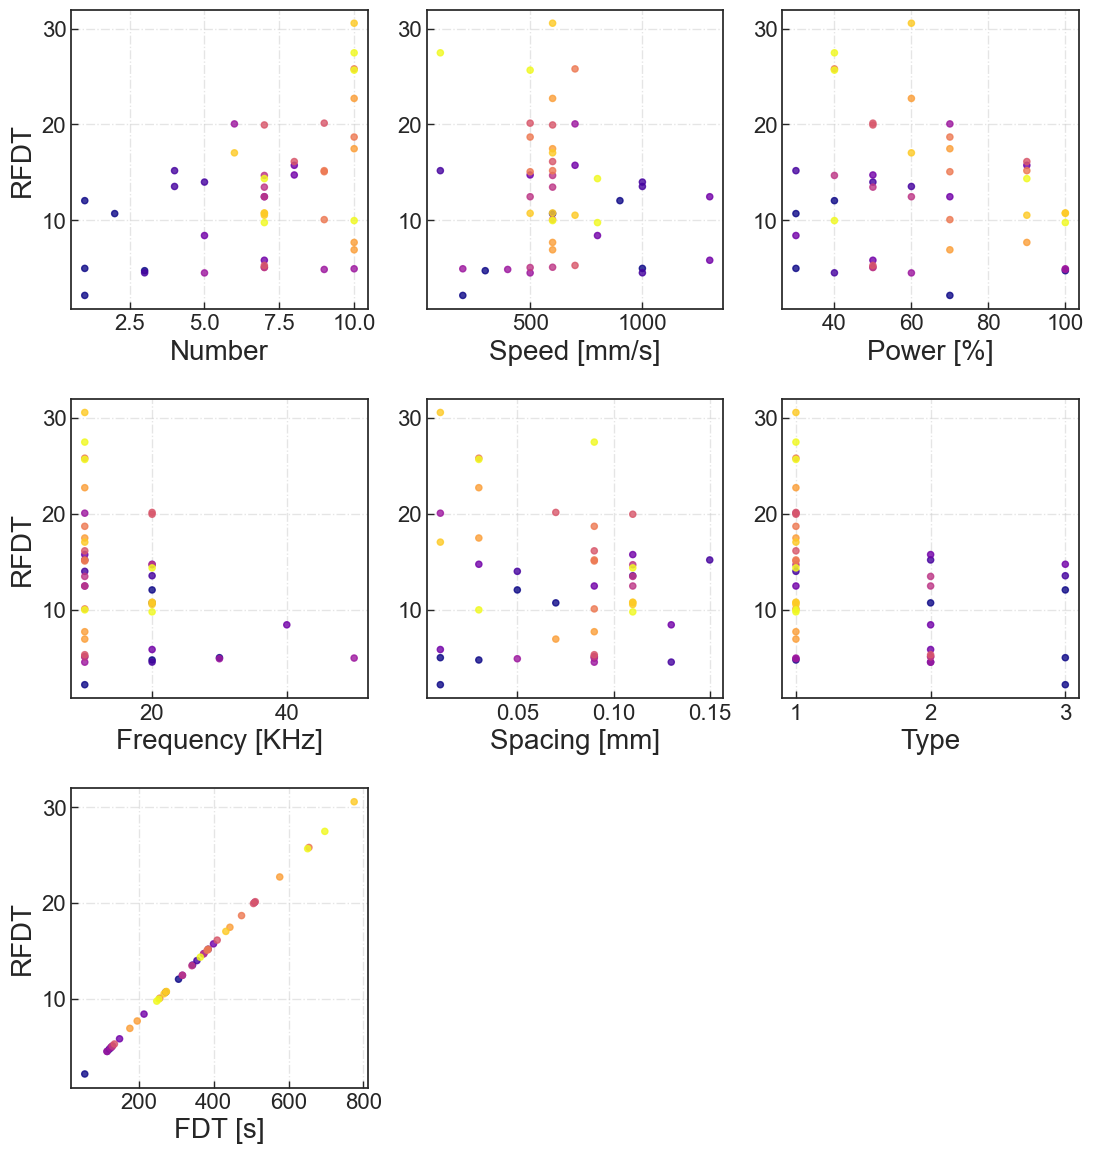

In [12]:
df = df_csc.iloc[:, 1:]

n_col = 3
y_indx = -1
color_indx = -1
column_names = df.columns.values
fs = 20

cmap = plt.get_cmap('plasma', 10)
print("The color is for variable", column_names[color_indx], "with yellow as the highest and purple as the lowest")

fig, axes = plt.subplots(3, n_col, figsize=(13, 14), sharey=False)
plt.subplots_adjust(hspace=0.3)

n = 0
for row in range(3):
    for col in range(n_col):
        if n < len(column_names) - 1:
            im = axes[row, col].scatter(df.iloc[:, n], df.iloc[:, y_indx],
                                         c=np.arange(len(df.iloc[:, color_indx])), s=20, cmap=cmap, alpha=0.8, edgecolors='face')
            axes[row, col].set_xlabel(column_names[n], fontsize=fs)
        else:
            axes[row, col].axis("off")
        n += 1
        axes[row, col].tick_params(direction='in', length=5, width=1, labelsize=fs * 0.8, grid_alpha=0.5)
        axes[row, col].grid(True, linestyle='-.')
        axes[row, 0].set_ylabel(column_names[y_indx], fontsize=fs)
plt.show()

# fig.savefig("full11.png", dpi=600, bbox_inches='tight')

The color is for variable Speed [mm/s] with red as the highest and blue as the lowest


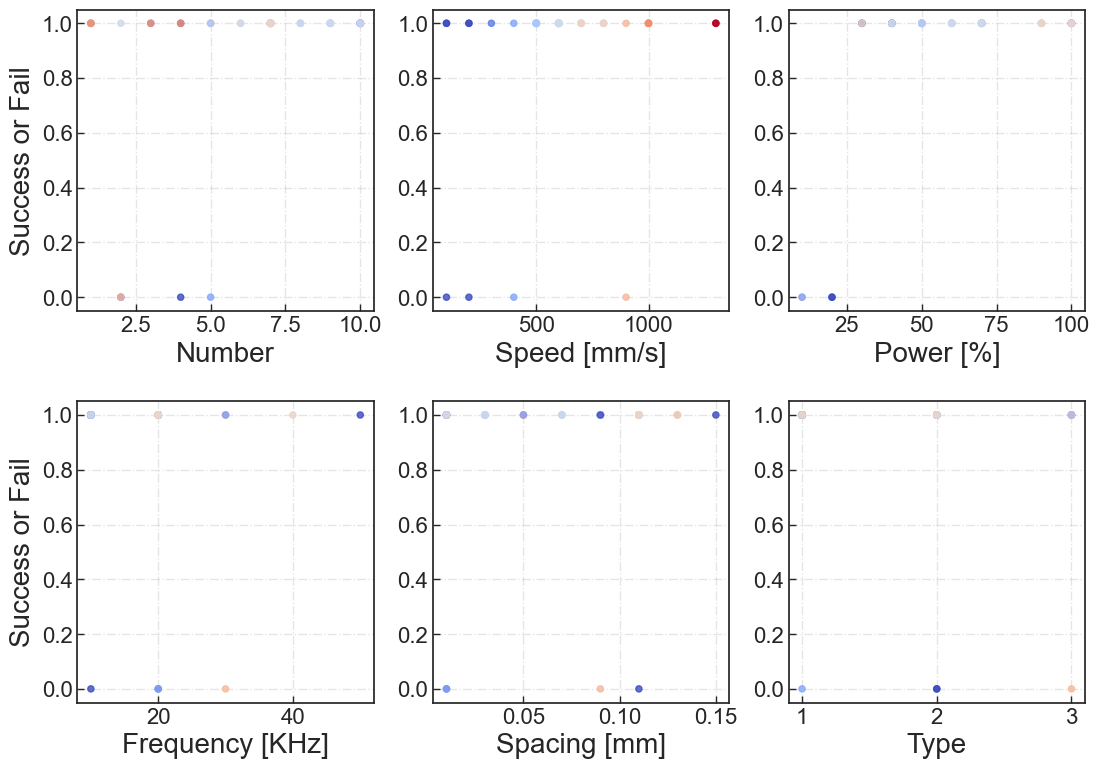

In [13]:
df = df_film.iloc[:, 1:-1]

n_col = 3
y_indx = -1
color_indx = 1
column_names = df.columns.values
fs = 20

cmap = plt.get_cmap('coolwarm', 10)
print("The color is for variable", column_names[color_indx], "with red as the highest and blue as the lowest")

fig, axes = plt.subplots(2, n_col, figsize=(13, 9), sharey=False)
plt.subplots_adjust(hspace=0.3)

n = 0
for row in range(2):
    for col in range(n_col):
        if n < len(column_names) - 1:
            
            im = axes[row, col].scatter(df.iloc[:, n], df.iloc[:, y_indx],
                                         c=df.iloc[:, color_indx], s=20, cmap=cmap, alpha=0.8, edgecolors='face')
            axes[row, col].set_xlabel(column_names[n], fontsize=fs)
        else:
            axes[row, col].axis("off")
        n += 1
        axes[row, col].tick_params(direction='in', length=5, width=1, labelsize=fs * 0.8, grid_alpha=0.5)
        axes[row, col].grid(True, linestyle='-.')
    axes[row, 0].set_ylabel(column_names[y_indx], fontsize=fs)

plt.show()
# fig.savefig("full2.png", dpi=600, bbox_inches='tight')